# <center>Projet Deep Learning - Exercice de classification</center>

In [63]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
import glob

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from keras.layers.core import Dense, Flatten
from tensorflow.keras.layers import InputLayer
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

On va afficher 5 images random présentes dans le fichier.

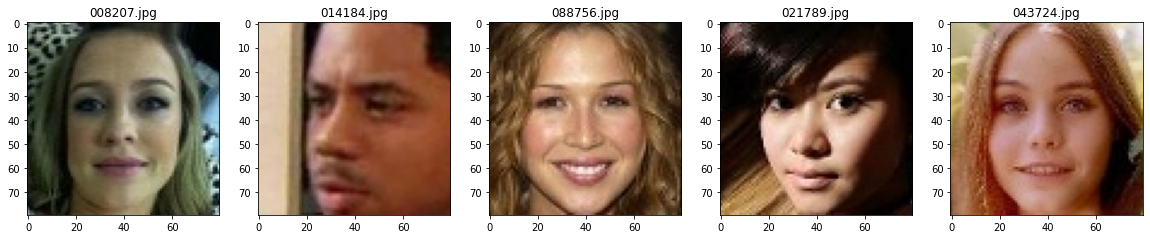

In [64]:
plt.figure(figsize=(20,20))
img_folder=os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_train')
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

##### Création des données d'image et des étiquettes à partir des images du dossier

- Le dossier source est le paramètre d'entrée contenant les images des différentes classes.

- Lire le fichier image du dossier et le convertir au bon format de couleur.

- Redimensionnez l'image en fonction de la dimension d'entrée requise pour le modèle.

- Convertir l'image en un tableau Numpy avec float32 comme type de données.

- Normaliser le tableau d'images pour avoir des valeurs réduites entre 0 et 1 de 0 à 255 pour une distribution de données similaire, ce qui permet une convergence plus rapide.

In [65]:
list_image = os.listdir(img_folder)
len(list_image)

119294

In [66]:
file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
# utilisez readline() pour lire la première ligne
line = file.readline()
i = 0
while line:
    i = i + 1
    # utilisez readline() pour lire la ligne suivante
    line = file.readline()
file.close()
print(i)

119294


In [67]:
# Modification de la dimension des images 
img_size = 224

def create_dataset(img_folder, nb):
   
    dict_df = {}
    img_data_array=[]
    class_name=[]
    label_file = open(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\label_nov2021_train.txt')
    label_file = label_file.readlines()
    imageList = os.listdir(img_folder)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (img_size, img_size),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
        class_name.append(label_file[i].replace("\n",""))
    file.close()
    return pd.DataFrame({'Image num': img_data_array,'label': class_name})
# extract the image array and class name
df = create_dataset(img_folder, 100)

In [68]:
df.to_csv(r'dataset.csv', index = False, sep = ';')
print(df)

                                            Image num label
0   [[[0.6313725490196078, 0.6078431372549019, 0.4...     1
1   [[[0.047058823529411764, 0.01568627450980392, ...     1
2   [[[0.023529411764705882, 0.054901960784313725,...     0
3   [[[0.07450980392156863, 0.18823529411764706, 0...     0
4   [[[0.011764705882352941, 0.0, 0.27058823529411...     0
..                                                ...   ...
95  [[[0.2627450980392157, 0.3411764705882353, 0.4...     1
96  [[[0.9529411764705882, 0.9490196078431372, 0.9...     1
97  [[[0.00784313725490196, 0.043137254901960784, ...     1
98  [[[0.47843137254901963, 0.4588235294117647, 0....     1
99  [[[0.03137254901960784, 0.08235294117647059, 0...     0

[100 rows x 2 columns]


In [69]:
img_folder_val = os.path.join(r'C:\Users\Armel\Desktop\Cours_ESIEA\Deep_Learning\nov2021_val')

def create_dataset_val(img_folder, nb):
   
    dict_df = {}
    img_data_array=[]
    imageList = os.listdir(img_folder)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
    file.close()
    return pd.DataFrame({'Image num': img_data_array,'label': 'nan'})
# extract the image array and class name
df_val = create_dataset_val(img_folder, 100)

In [70]:
df_val.to_csv(r'dataset_val.csv', index = False, sep = ';')
print(df_val)

                                            Image num label
0   [[[0.6313725490196078, 0.6078431372549019, 0.4...   nan
1   [[[0.047058823529411764, 0.01568627450980392, ...   nan
2   [[[0.023529411764705882, 0.054901960784313725,...   nan
3   [[[0.07450980392156863, 0.18823529411764706, 0...   nan
4   [[[0.011764705882352941, 0.0, 0.27058823529411...   nan
..                                                ...   ...
95  [[[0.2627450980392157, 0.3411764705882353, 0.4...   nan
96  [[[0.9529411764705882, 0.9490196078431372, 0.9...   nan
97  [[[0.00784313725490196, 0.043137254901960784, ...   nan
98  [[[0.47843137254901963, 0.4588235294117647, 0....   nan
99  [[[0.03137254901960784, 0.08235294117647059, 0...   nan

[100 rows x 2 columns]


#### Création du réseau convolutif de base

In [72]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

Ci-dessus, nous pouvons voir que la sortie de chaque couche Conv2D et MaxPooling2D est un tenseur 3D de forme (hauteur, largeur, canaux). Les dimensions de la largeur et de la hauteur ont tendance à se réduire à mesure que l'on s'enfonce dans le réseau. Le nombre de canaux de sortie pour chaque couche Conv2D est contrôlé par le premier argument (par exemple, 32 ou 64).

##### Ajout de couches denses sur le dessus
- Le dataset possède 2 classes donc on va utiliser une couche dense finale avec 2 sorties.


In [74]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

Ainsi, nos sorties (4, 4, 64) ont été aplaties en vecteurs de forme (1024) avant de passer par deux couches denses.

#### Compiler et entraîner le modèle

In [80]:
X_train = np.concatenate( df['Image num'], axis=0 )
X_train[:-100]


array([[[0.63137255, 0.60784314, 0.47058824],
        [0.63137255, 0.60784314, 0.47058824],
        [0.62352941, 0.60392157, 0.46666667],
        ...,
        [0.80392157, 0.77647059, 0.57647059],
        [0.8       , 0.77254902, 0.57647059],
        [0.8       , 0.77254902, 0.57647059]],

       [[0.63137255, 0.60784314, 0.47058824],
        [0.63137255, 0.60784314, 0.47058824],
        [0.62352941, 0.60392157, 0.46666667],
        ...,
        [0.80392157, 0.77647059, 0.57647059],
        [0.8       , 0.77254902, 0.57647059],
        [0.8       , 0.77254902, 0.57647059]],

       [[0.62745098, 0.60392157, 0.47058824],
        [0.62745098, 0.60392157, 0.47058824],
        [0.62352941, 0.6       , 0.46666667],
        ...,
        [0.8       , 0.77647059, 0.57647059],
        [0.79607843, 0.77254902, 0.57647059],
        [0.79607843, 0.77254902, 0.57647059]],

       ...,

       [[0.03137255, 0.03529412, 0.02745098],
        [0.03137255, 0.03529412, 0.02745098],
        [0.03137255, 0

In [77]:
y_train = np.array(df['label'])
y_train.shape

(100,)

In [82]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(X_train, y_train)

ValueError: in user code:

    File "C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 224, 3)
